In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [3]:
cmpny_data=pd.read_csv("Company_Data.csv")
cmpny_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cmpny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
cmpny_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
c_data=cmpny_data.drop('Sales',axis=1)
c_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
company_data=pd.DataFrame(pd.cut(cmpny_data.Sales,bins=3,labels=['Low','Medium','High']))
company_data

,Sales
0,Medium
1,High
2,Medium
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Medium


In [7]:
Company_Data=pd.concat([c_data,company_data],axis=1)
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


<AxesSubplot:xlabel='Sales', ylabel='Income'>

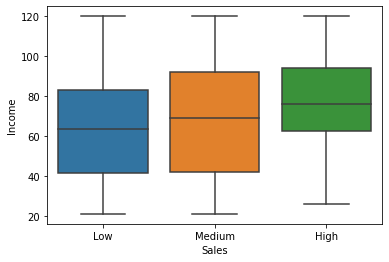

In [8]:
sns.boxplot(x='Sales',y='Income',data=Company_Data)

<AxesSubplot:xlabel='Sales'>

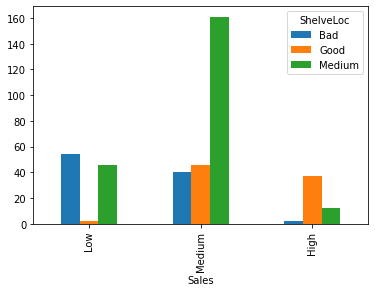

In [9]:
pd.crosstab(Company_Data.Sales,Company_Data.ShelveLoc).plot(kind='bar')

<AxesSubplot:xlabel='Sales'>

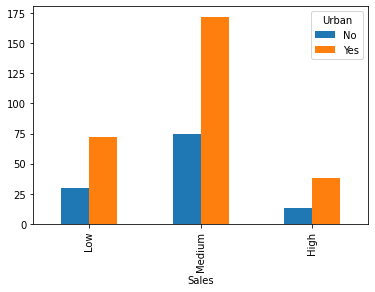

In [10]:
pd.crosstab(Company_Data.Sales,Company_Data.Urban).plot(kind='bar')

<AxesSubplot:>

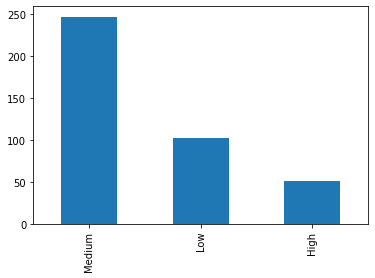

In [11]:
Company_Data['Sales'].value_counts().plot(kind='bar')

In [12]:
data_category=Company_Data.select_dtypes(exclude=[np.number]).columns
data_category

Index(['ShelveLoc', 'Urban', 'US', 'Sales'], dtype='object')

In [13]:
Company_Data[data_category].head()

,ShelveLoc,Urban,US,Sales
0,Bad,Yes,Yes,Medium
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,Medium
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low


In [14]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
for i in data_category:
    Company_Data[i]=labelEncoder.fit_transform(Company_Data[i])


In [15]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [16]:
x=Company_Data.iloc[:,0:10]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [17]:
y=Company_Data.iloc[:,10]
y.head()

0    2
1    0
2    2
3    2
4    1
Name: Sales, dtype: int32

In [18]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

# Building Decision Tree Classifier using gini Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

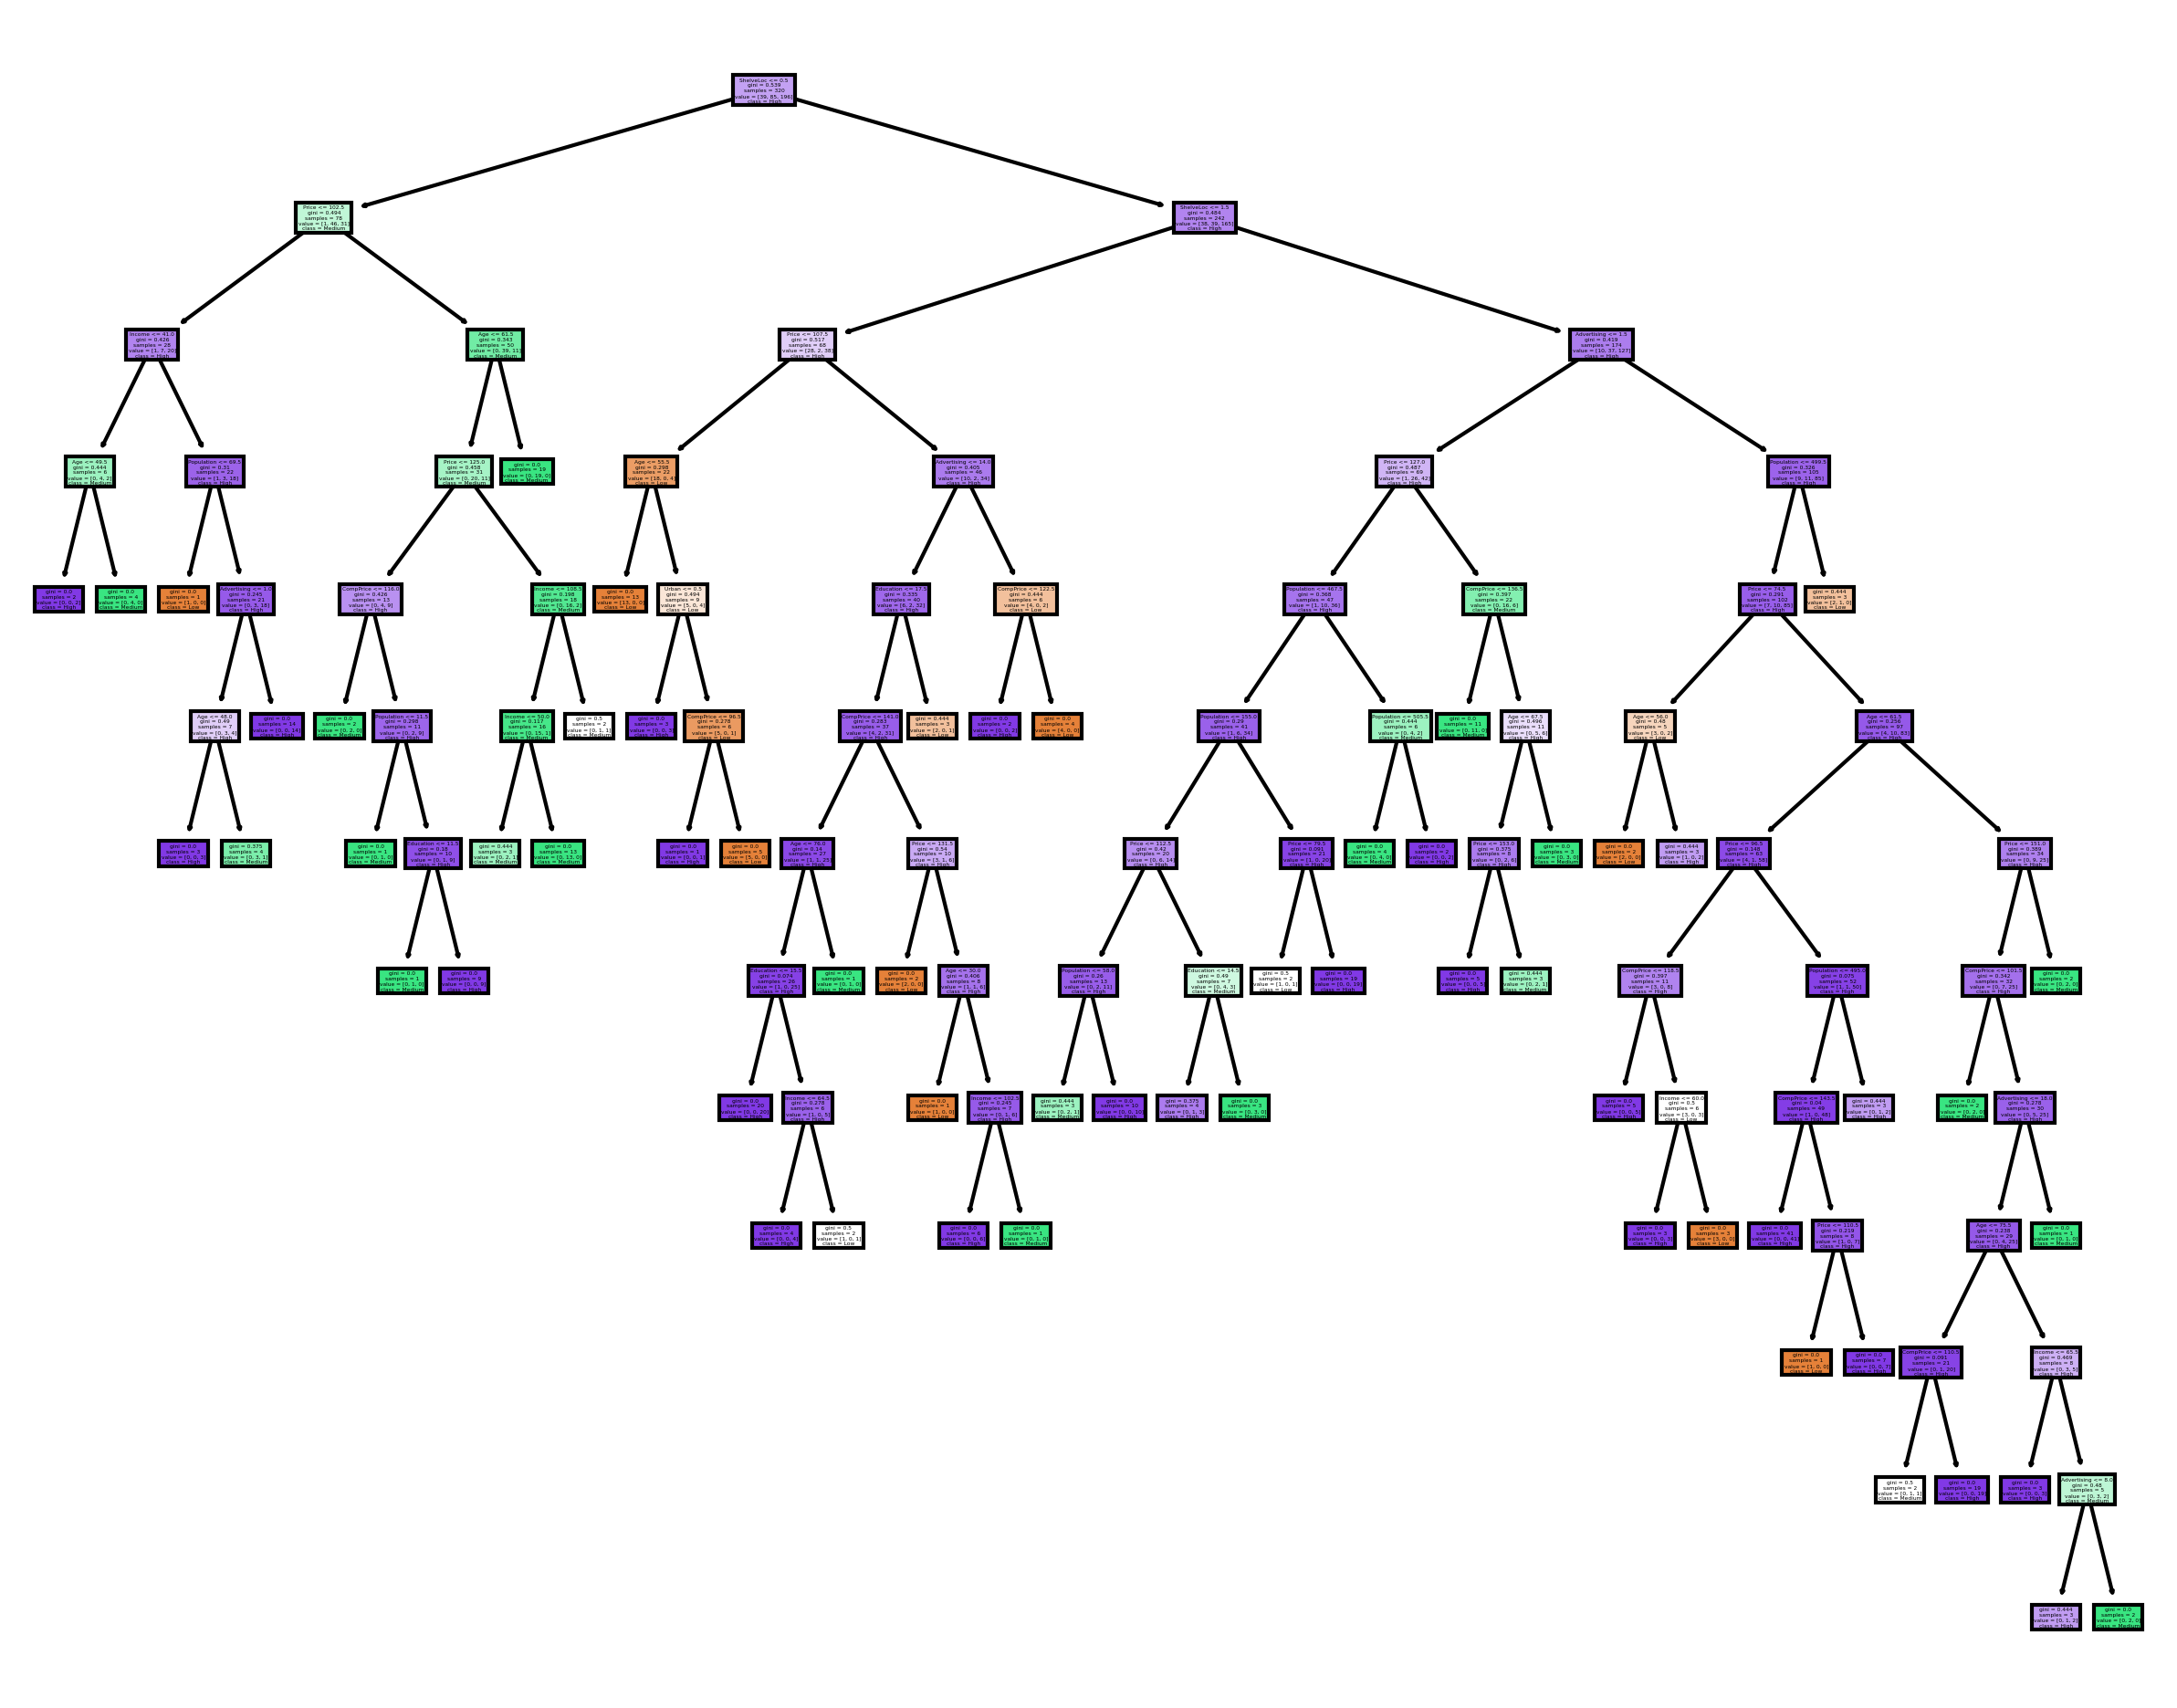

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
predict=model.predict(x_test)
pd.Series(predict).value_counts()

2    55
1    18
0     7
dtype: int64

In [22]:
from sklearn import metrics
print("Accuracy is",metrics.accuracy_score(predict,y_test)*100,'%')

Accuracy is 65.0 %


# Building Decision Tree Classifier (CART) using entropyCriteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

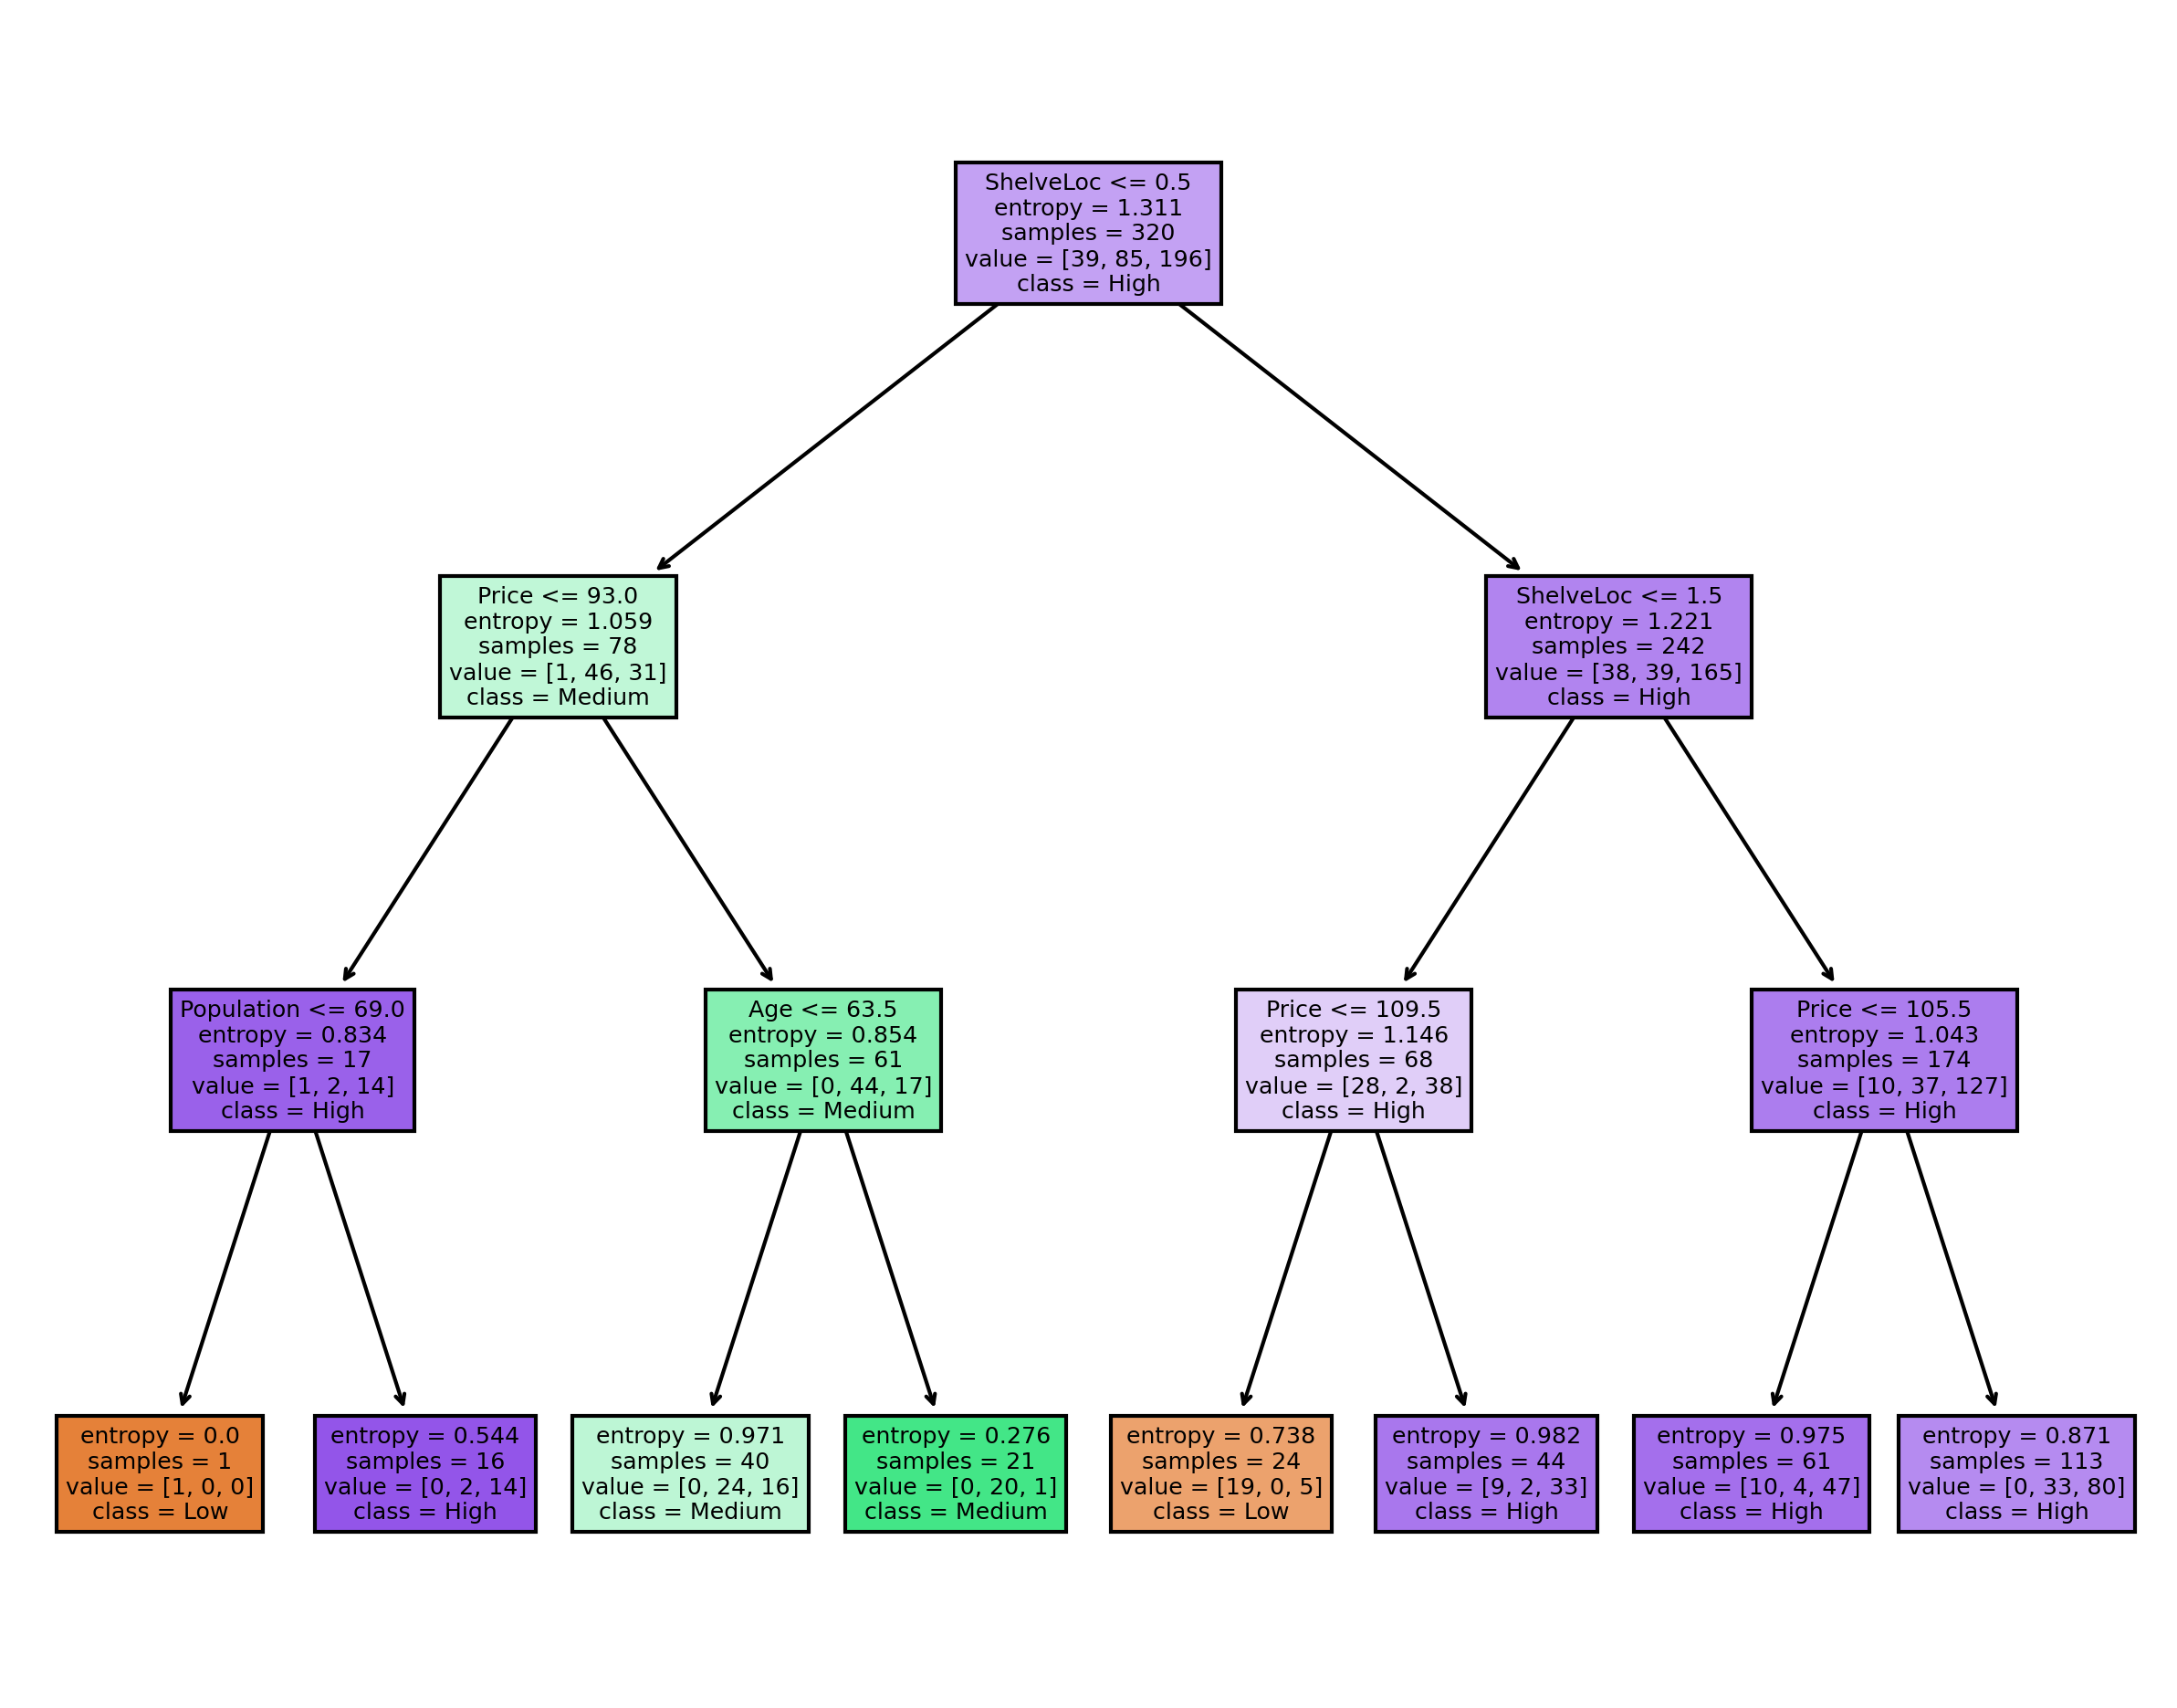

In [25]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predict)
print (confusion_matrix) 

[[ 5  1  6]
 [ 1  7  9]
 [ 1 10 40]]


In [27]:
from sklearn import metrics
pred=model_gini.predict(x_test)
print("Accuracy is",metrics.accuracy_score(pred,y_test)*100,'%')

Accuracy is 66.25 %


# Tree Prununig

In [30]:
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=6)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [32]:
DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=6,max_features=None,max_leaf_nodes=10,min_samples_leaf=6,
                        min_samples_split=2,min_weight_fraction_leaf=0.0,random_state=None,splitter='random')

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=6,
                       splitter='random')

In [36]:
pre=dtree.predict(x_test)


In [38]:
metrics.accuracy_score(pre,y_test)

0.725

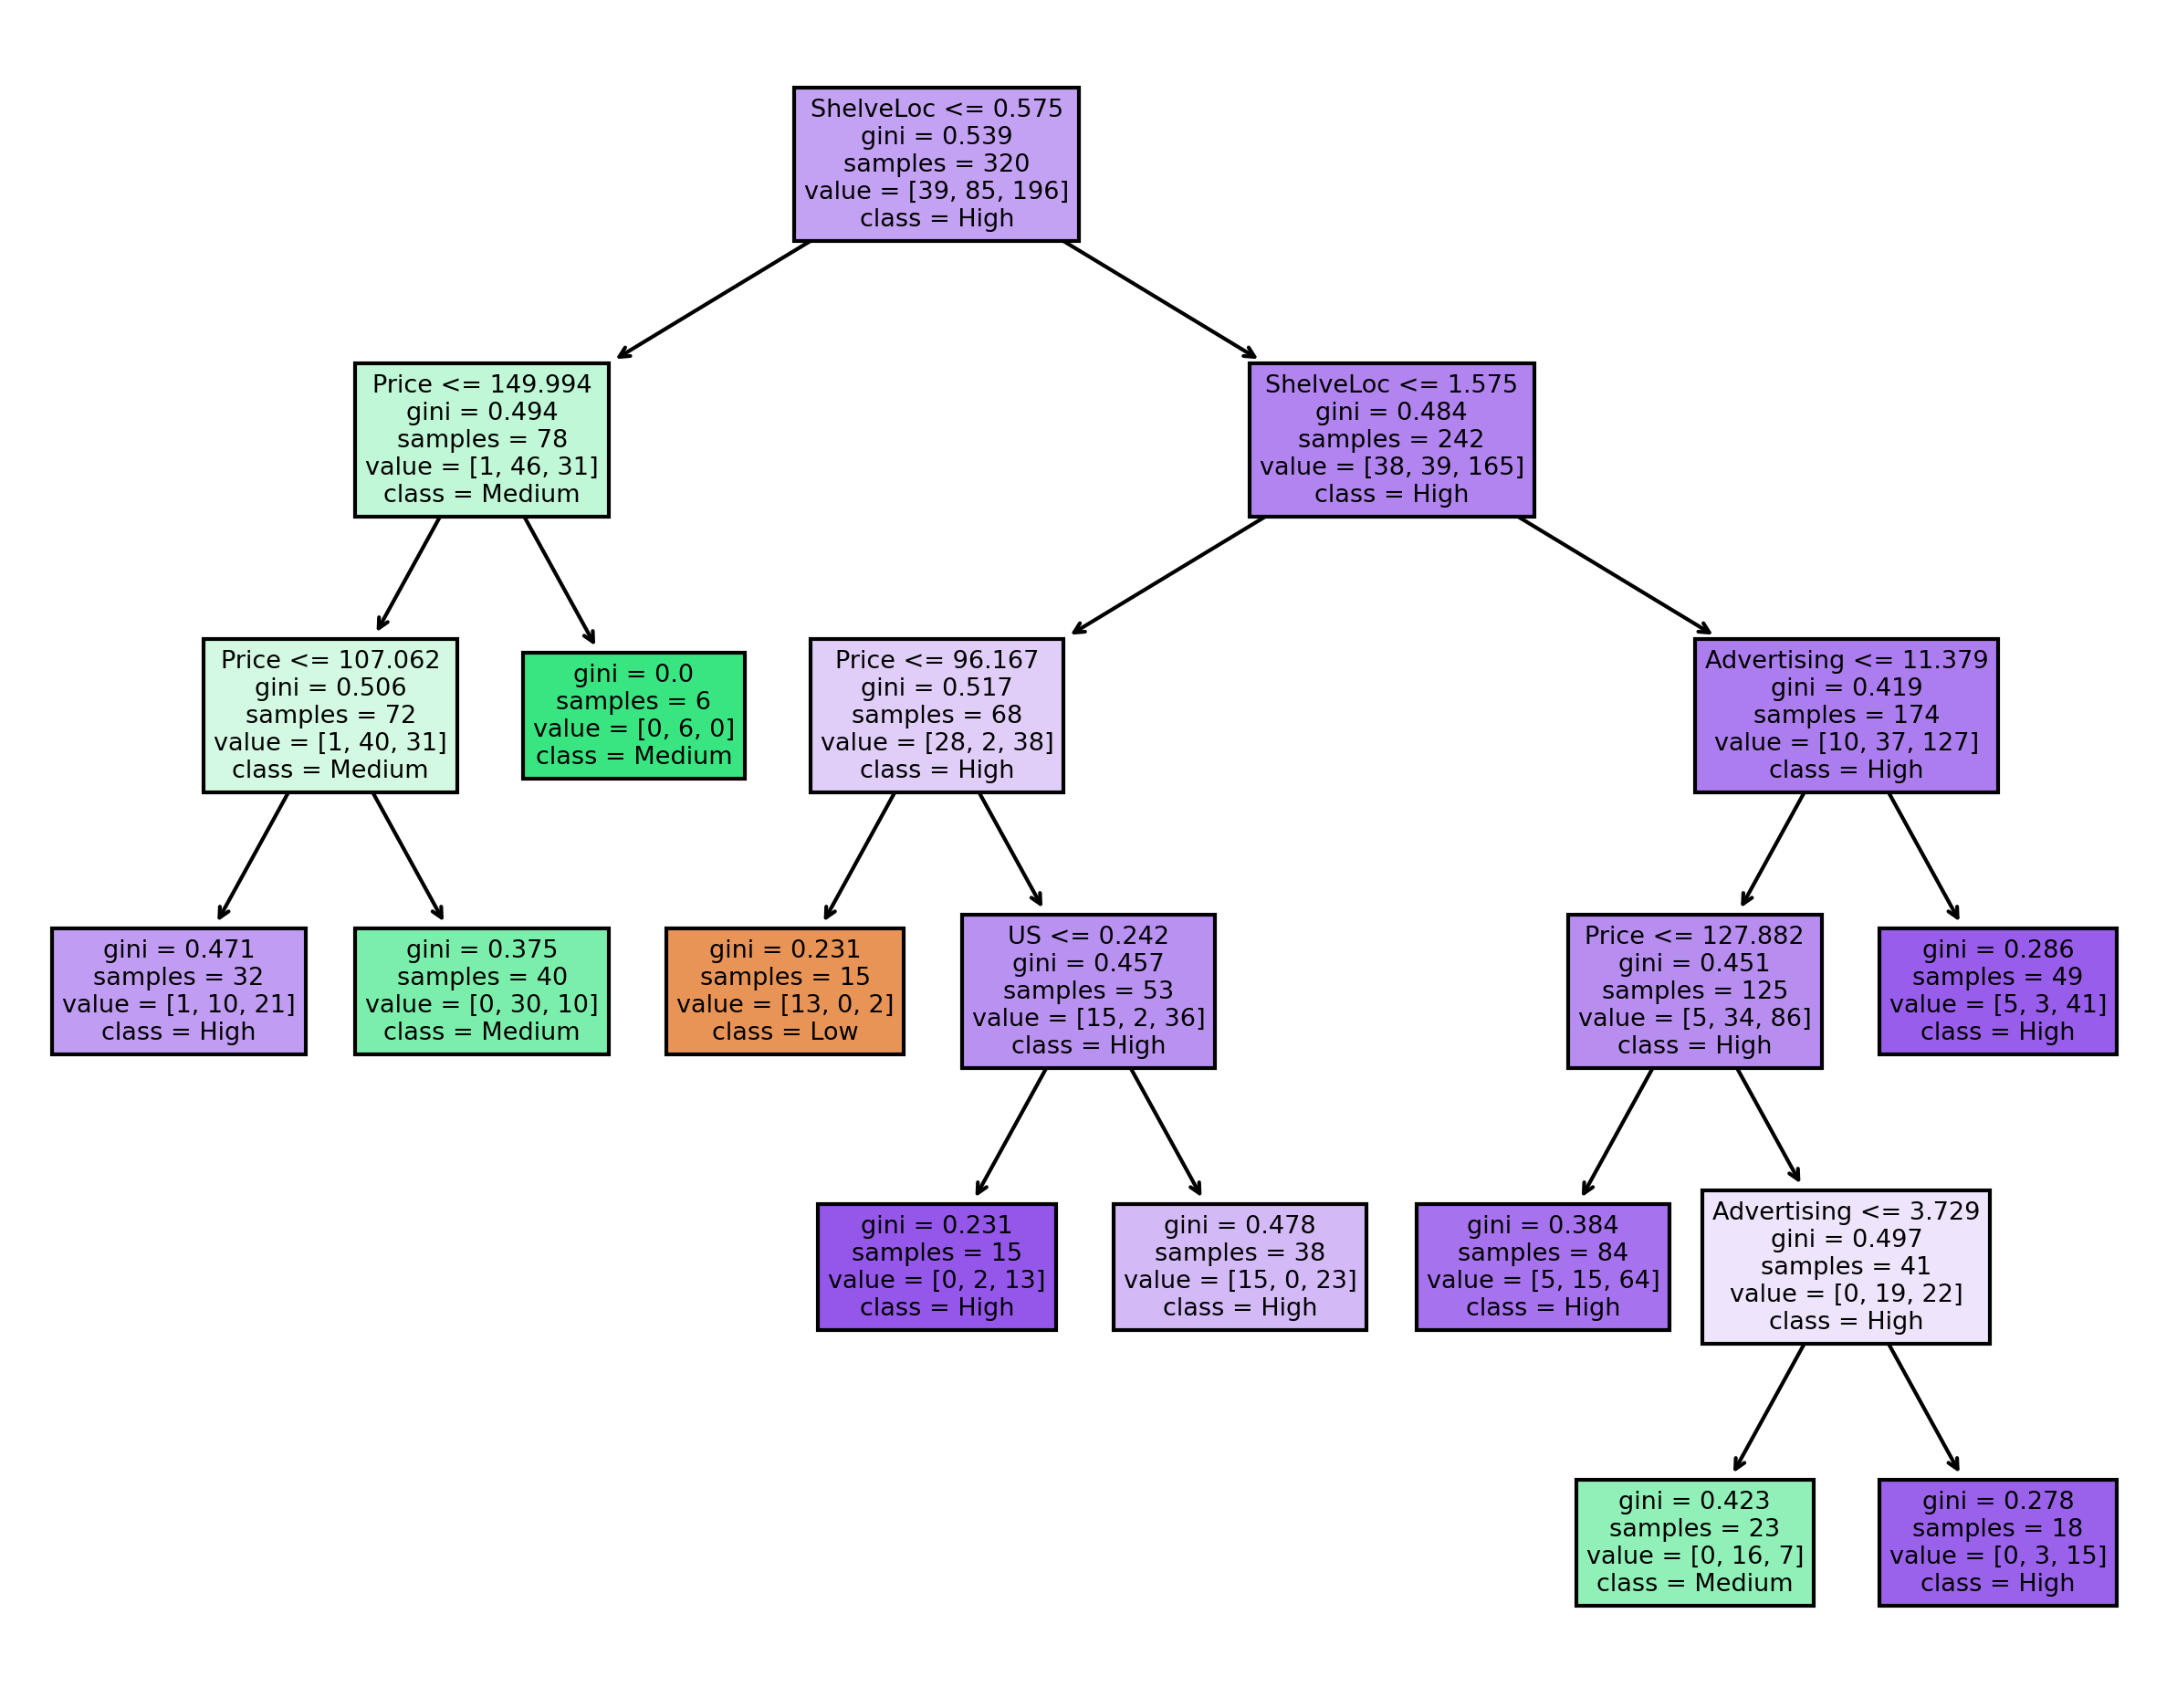

In [39]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);